In [1]:
import os
import requests
import pandas
import datetime
import matplotlib.pylab as plt
import seaborn

In [2]:
# Set up figure defaults
plt.rcParams['figure.figsize'] = (16, 9)  # Size up figures a bit

In [3]:
# Style plots
plt.style.use('seaborn-darkgrid')

In [4]:
# Grab the CSV data linked from the BFS website
# https://www.bfs.admin.ch/bfs/de/home/statistiken/bevoelkerung/geburten-todesfaelle.assetdetail.12727517.html
if not os.path.isfile('master'):
    csv = requests.get('https://www.bfs.admin.ch/bfsstatic/dam/assets/12727517/master')
    file = open('master', 'wb')
    file.write(csv.content)
    file.close()

In [5]:
# Read the data
data = pandas.read_csv('master', sep=';', low_memory=False)

In [6]:
# Generate date column from data
# We have to artificially add a fake Monday ("+ '-1'") to make it nicely parseable 🤪
data['Date'] = [datetime.datetime.strptime(t + '-1', '%G-W%V-%w') for t in data['TIME_PERIOD']]
data['Year'] = [d.year for d in data['Date']]
data['Month'] = [d.month for d in data['Date']]
data['Week'] = [d.week for d in data['Date']]

In [7]:
# How is the age data saved?
data['AGE'].unique()

array(['_T', 'Y0T4', 'Y10T14', 'Y15T19', 'Y20T24', 'Y25T29', 'Y30T34',
       'Y35T39', 'Y40T44', 'Y45T49', 'Y50T54', 'Y55T59', 'Y60T64',
       'Y65T69', 'Y70T74', 'Y75T79', 'Y80T84', 'Y85T89', 'Y_GE90', 'Y5T9'],
      dtype=object)

In [8]:
# Drop the '_T' age, we don't know what it is :)
data.drop(data.index[data['AGE'] == '_T'], inplace = True)

In [9]:
# Rename the young ages to help with sorting
data.replace('Y0T4','Y00T04', inplace=True)
data.replace('Y5T9','Y05T09', inplace=True)

In [10]:
# How is the age data saved?
data['GEO'].unique()

array(['CH', 'CH01', 'CH02', 'CH03', 'CH04', 'CH05', 'CH06', 'CH07'],
      dtype=object)

In [11]:
# The data is split up in regions.
# Region 'CH' is the cumulative data (see two commented lines below), thus we remove all the other data
# for geo in data.GEO.unique():
#     print(geo, data[(data.Year==2010) & (data.GEO==geo)]['Obs_value'].sum())
data.drop(data.index[data['GEO'] != 'CH'], inplace = True)

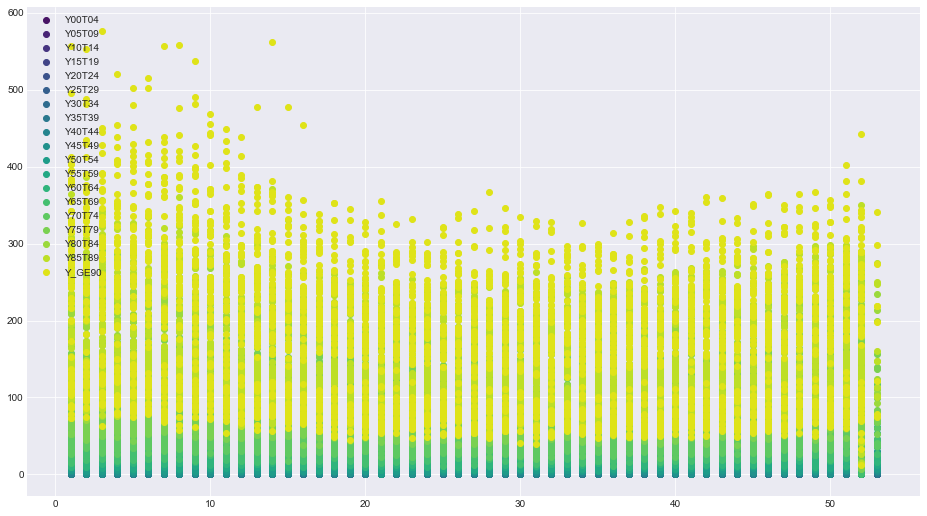

In [12]:
# Plot the data for each age
for c, age in enumerate(sorted(data['AGE'].unique())):
    plt.scatter(data[data.AGE==age]['Week'],
                data[data.AGE==age]['Obs_value'],
                label=age,
                color=seaborn.color_palette('viridis',
                                            len(data['AGE'].unique()))[c])
plt.legend(loc='upper left')
plt.show()

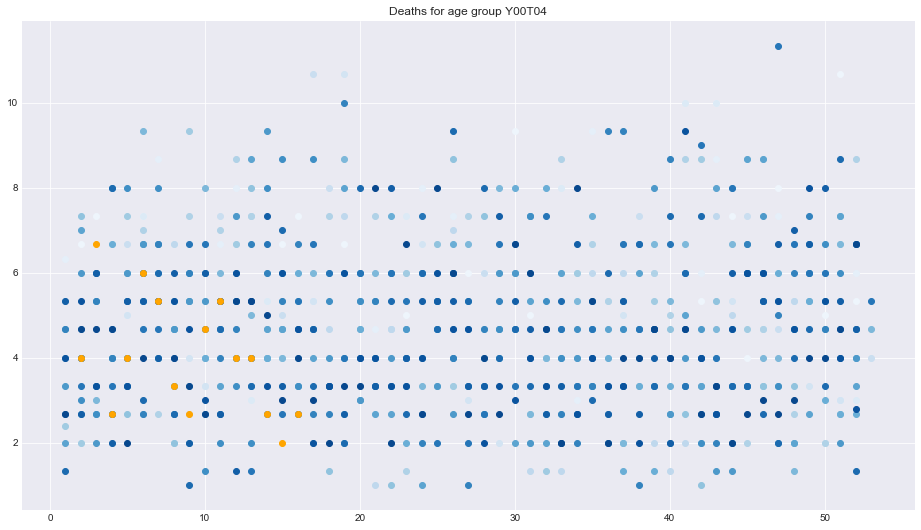

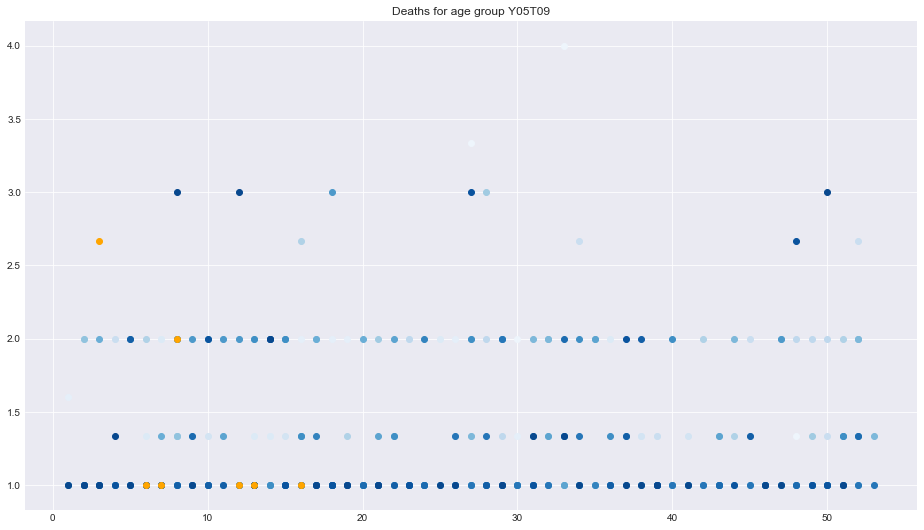

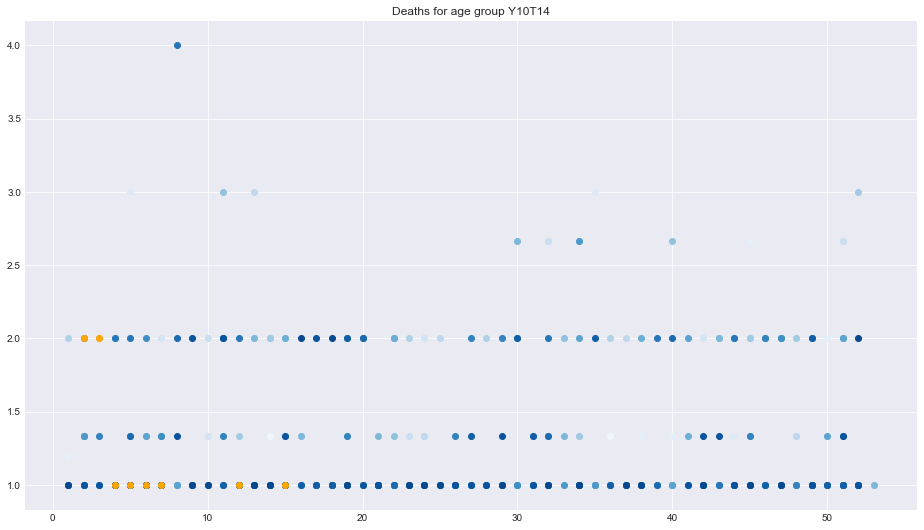

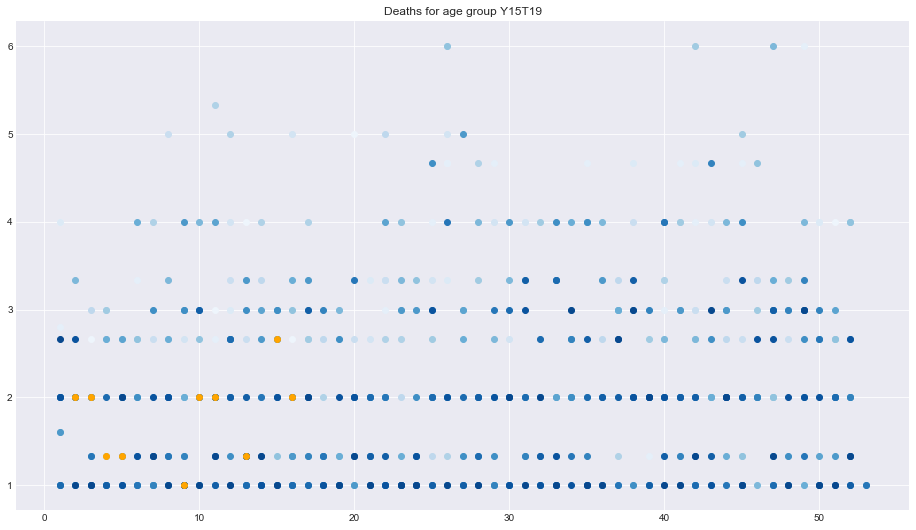

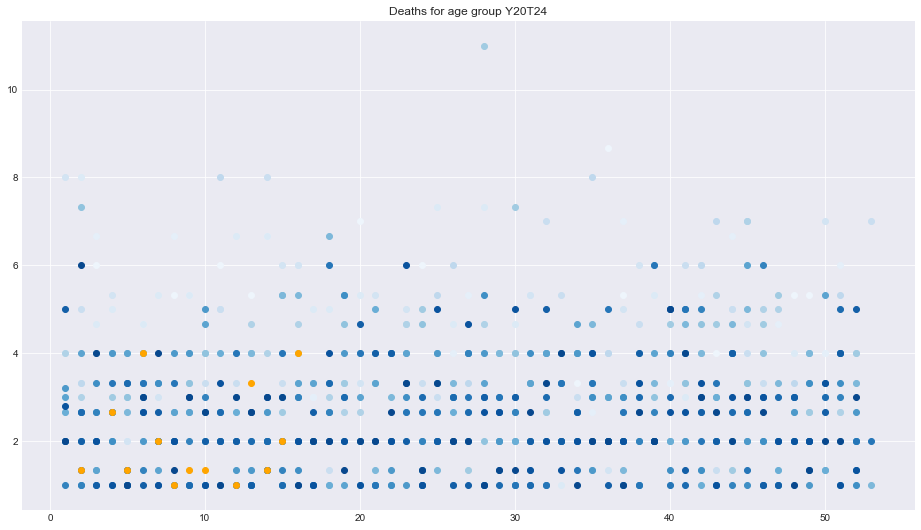

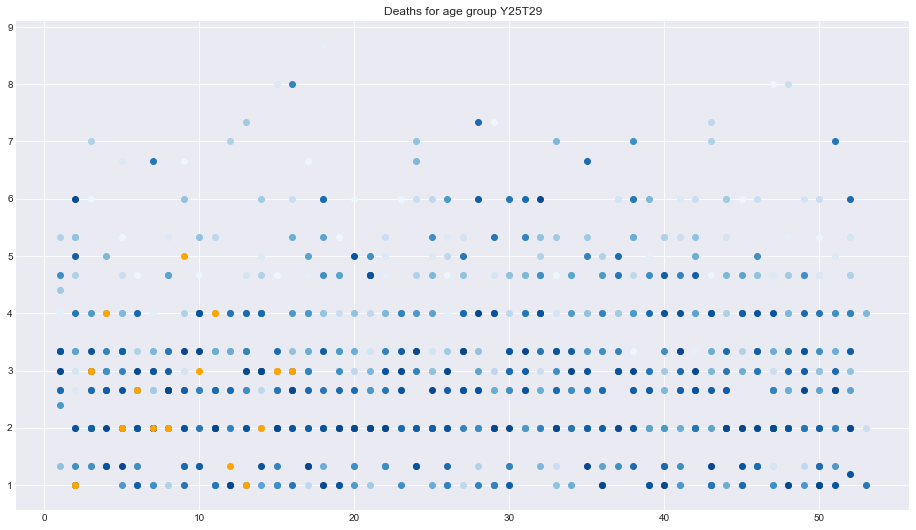

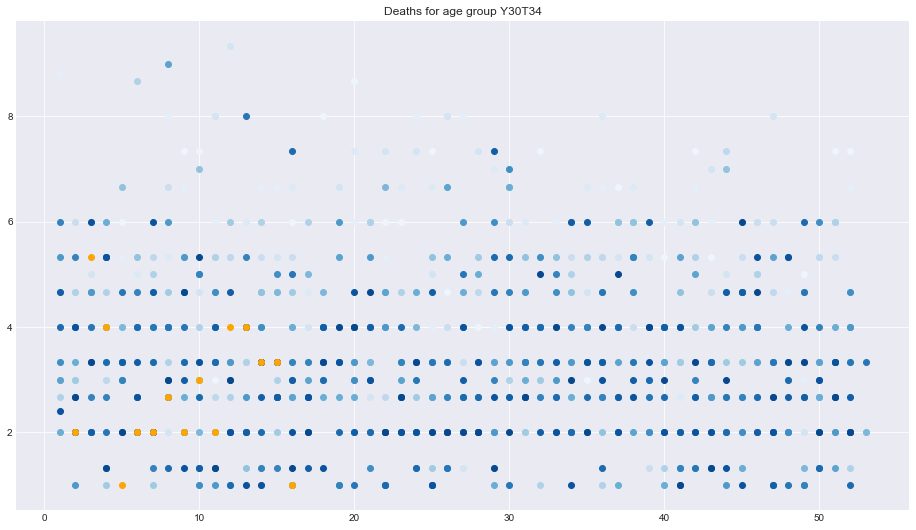

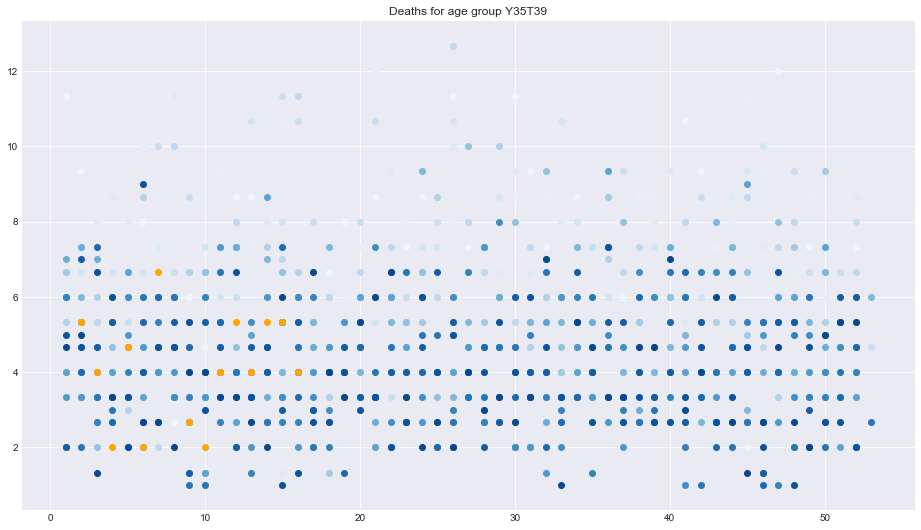

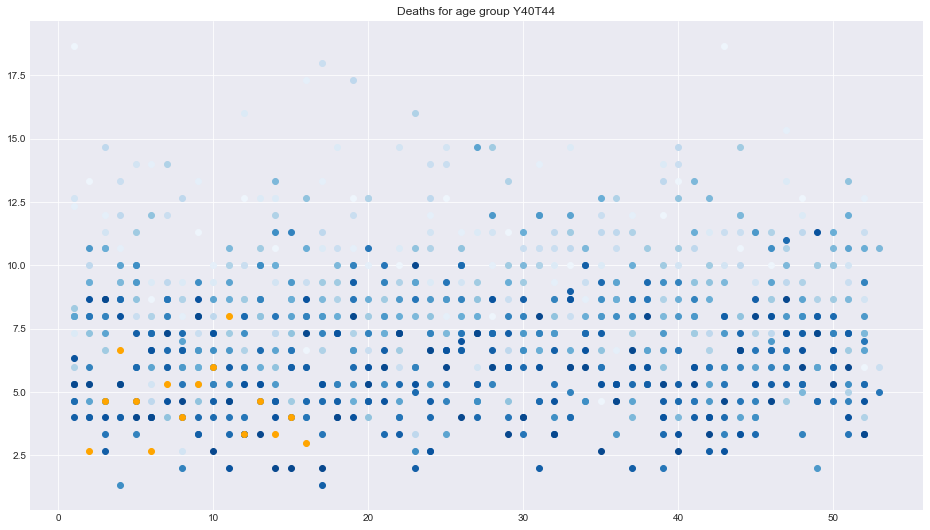

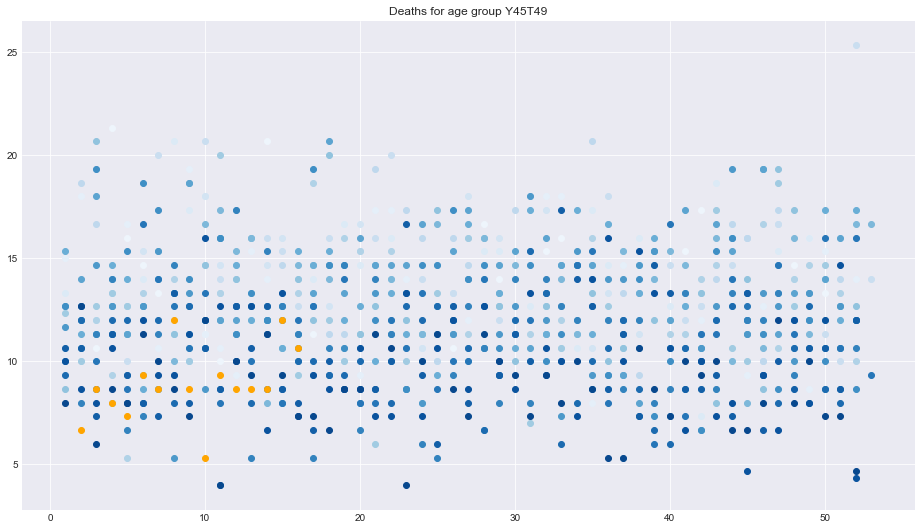

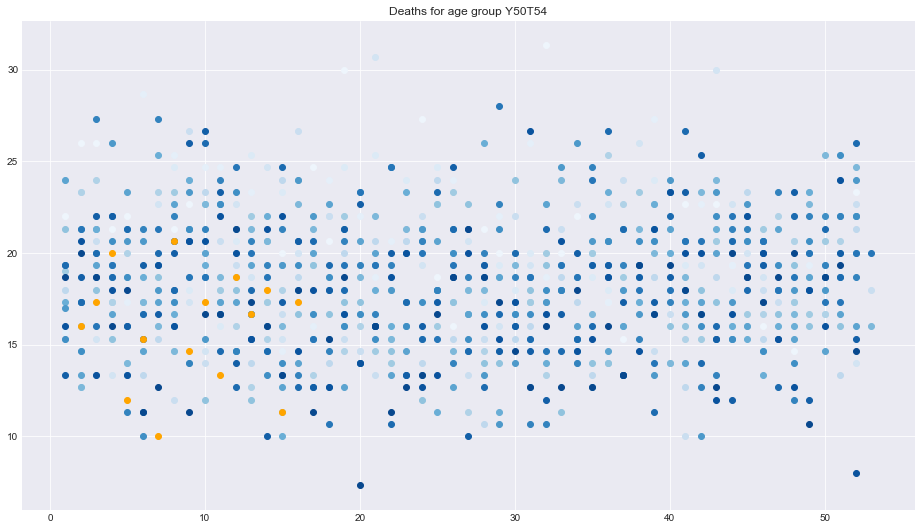

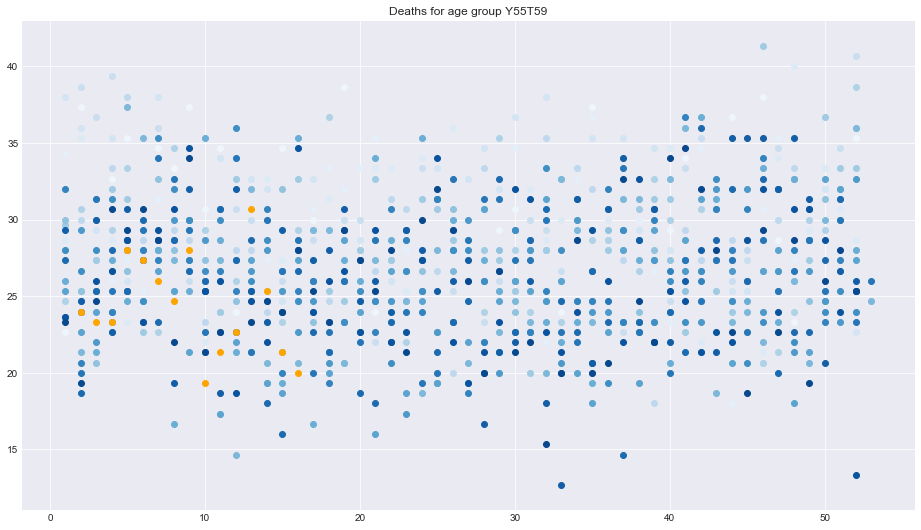

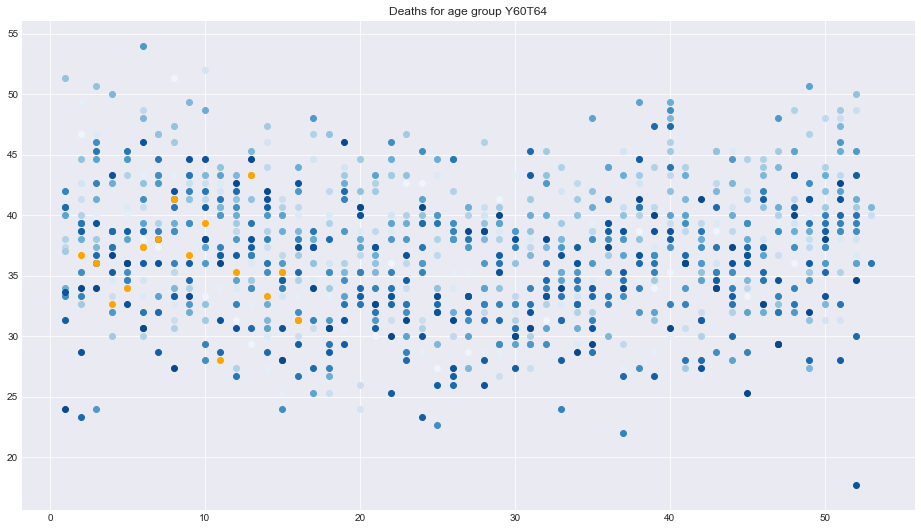

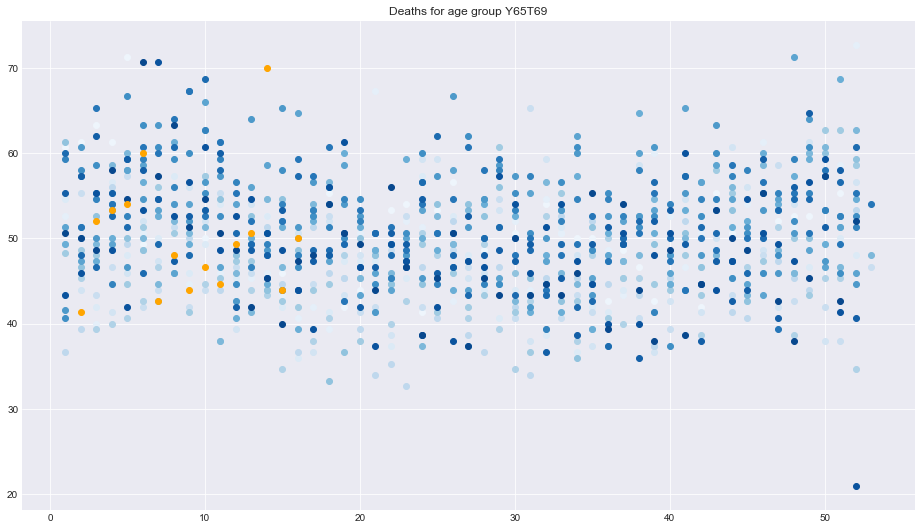

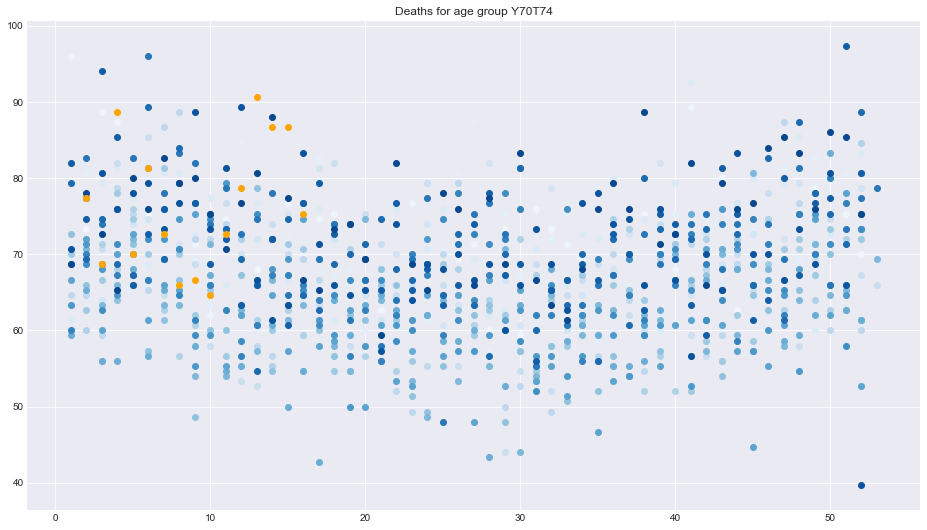

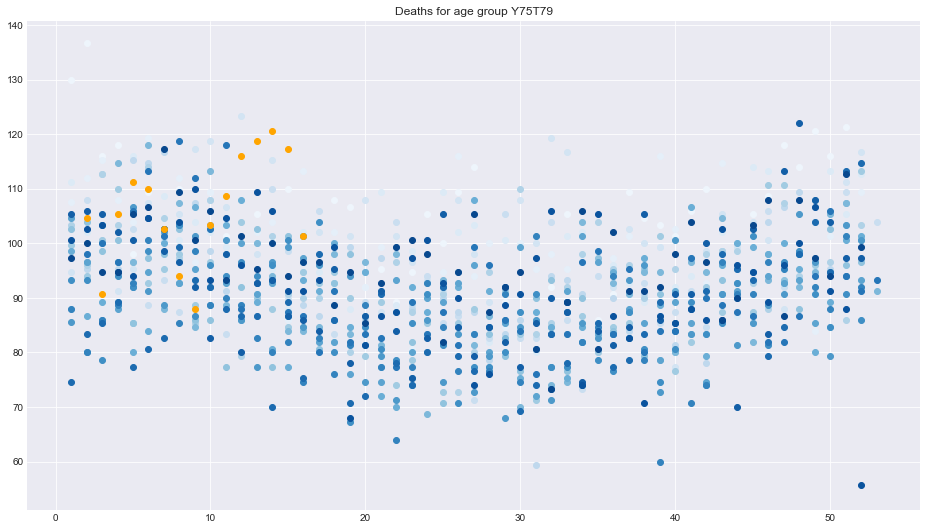

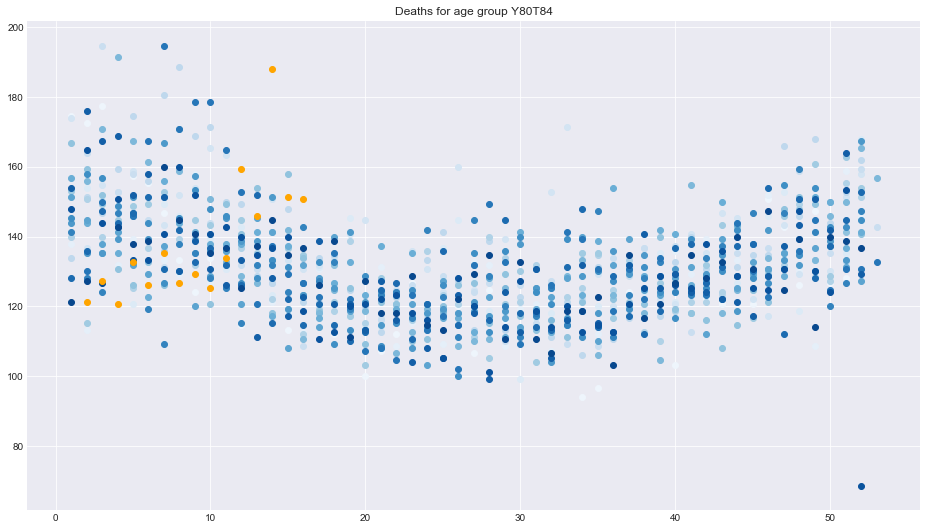

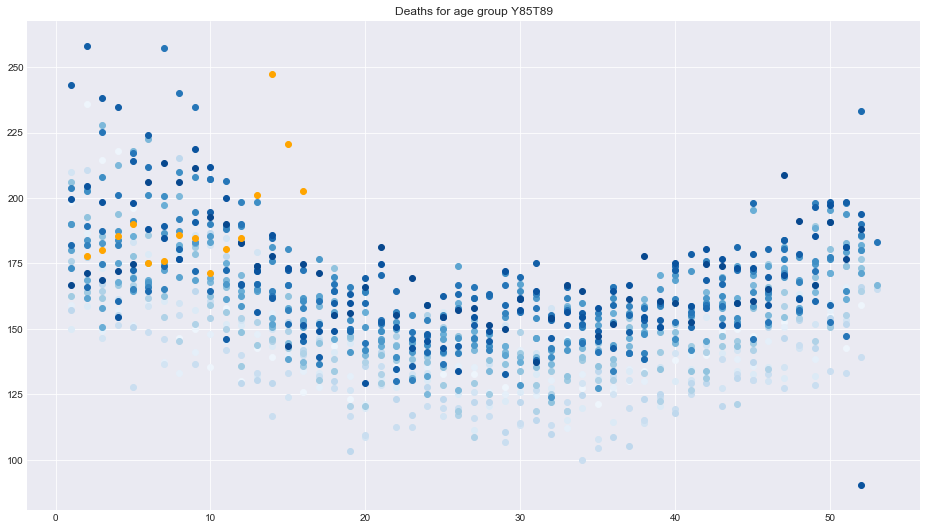

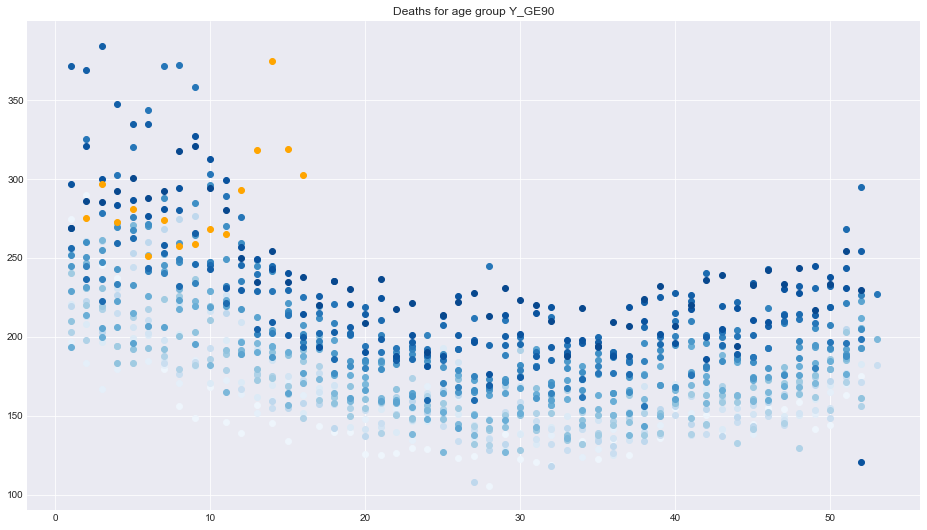

In [14]:
# Plot the data for each age by overlaying the years
# Adapted with input from https://python-graph-gallery.com/123-highlight-a-line-in-line-plot/
for age in sorted(data['AGE'].unique()):
    # plot all years except the last one
    for c, year in enumerate(sorted(data['Year'].unique())[:-1]):
        for d, week in enumerate(sorted(data['Week'].unique())):
            plt.scatter(week,
                        data[(data.AGE==age) & (data.Year==year) & (data.Week==week)]['Obs_value'].mean(),
                        color=seaborn.color_palette('Blues',
                                                    len(data['Year'].unique()))[c])
    # plot 2020 differently
    year = 2020
    for d, week in enumerate(sorted(data['Week'].unique())):
        plt.scatter(week,
                    data[(data.AGE==age) & (data.Year==year) & (data.Week==week)]['Obs_value'].mean(),
                    color='orange')
    plt.xlabel='Week of %s' % year
    plt.yabel='Deaths'
    plt.title('Deaths for age group %s' % age)
    plt.show()

In [15]:
print('Done')

Done
